In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/btcn-spam-email/spam_email.txt


In [2]:
data = pd.read_csv('../input/btcn-spam-email/spam_email.txt',sep=' ')
onlydata=data.loc[:,'make':'cap_total']
data.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [3]:
onlydata.describe(include='all')

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=onlydata.values
yCG=data.values[:,57]
y=np.zeros((yCG.size))
y[yCG=='spam']=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

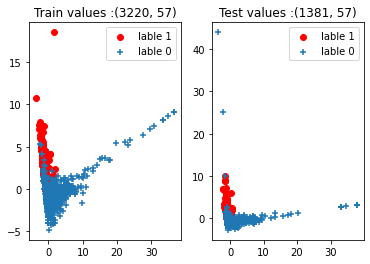

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca= PCA(n_components=2)
fig, (plt_train, plt_test) = plt.subplots(1, 2)
datab=pca.fit_transform(X_train_scaled)
A1=datab[(y_train==1)]
A2=datab[(y_train==0)]
plt_train.set_title('Train values :'+ str(X_train_scaled.shape))
plt_train.scatter(A1[:,0],A1[:,1],marker='o',c="red")
plt_train.scatter(A2[:,0],A2[:,1],marker='+')
plt_train.legend(['lable 1','lable 0'])
datac=pca.fit_transform(X_test_scaled)
B1=datac[(y_test==1)]
B2=datac[(y_test==0)]
plt_test.set_title('Test values :'+str(X_test_scaled.shape))
plt_test.scatter(B1[:,0],B1[:,1],marker='o',c="red")
plt_test.scatter(B2[:,0],B2[:,1],marker='+')
plt_test.legend(['lable 1','lable 0'])


In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca= PCA(n_components=2)

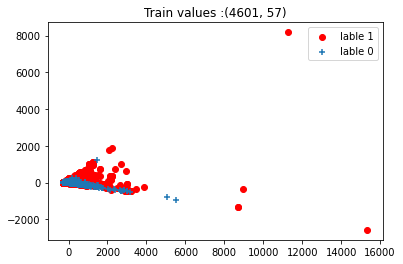

In [7]:
datad=pca.fit_transform(X)
C1=datad[(y==1)]
C2=datad[(y==0)]
plt.title('Train values :'+ str(X.shape))
plt.scatter(C1[:,0],C1[:,1],marker='o',c="red")
plt.scatter(C2[:,0],C2[:,1],marker='+')
plt.legend(['lable 1','lable 0'])
plt.savefig('lettersCG_X.png')


In [8]:
class RatingModel:
    def __init__(self, y_, y_Pr):
      self.y_=y_
      self.y_Pr=y_Pr
      self.TN=np.size(y_Pr[(y_Pr==-1)&(y_==y_Pr)])
      self.FN=np.size(y_Pr[(y_Pr==-1)&(y_!=y_Pr)])
      self.TP=np.size(y_Pr[(y_Pr==1)&(y_==y_Pr)])
      self.FP=np.size(y_Pr[(y_Pr==1)&(y_!=y_Pr)])
      self.y_[self.y_==0]=-1
      self.y_Pr[self.y_Pr==0]=-1
      
    def __rep__():
        return ""
    def accur_Error(self, y_, y_Pr):
        rs=(self.TP+self.TN)/(y_.size)
        return [rs,(1-rs)]
    def sensitivity(self):
        P=np.size(self.y_[self.y_==1])
        return (self.TP)/(P)
    def specificity(self):
        N=np.size(self.y_[self.y_==-1])
        return (self.TN)/(N)
    def precision(self):
        rs=self.TP+self.FP
        return (self.TP)/(rs)
    def recall(self):
        rs=self.TP+self.FN
        return (self.TP)/(rs)
    def rating(self):
        return [self.accur_Error(self.y_, self.y_Pr), self.sensitivity(), self.specificity(), self.precision(), self.recall()]
class DecisionStump:
    def __init__(self, T=100):
        self.T = T
        pass

    def fit(self, X: np.ndarray, y: np.ndarray, sample_weight: np.ndarray):
        T = self.T
        W=sample_weight
        nrow, ncol = X.shape
        assert nrow == y.size

        bestn = 0
        bestd = 1
        bestp = 0
        minerr = W.sum()
        for i in range(ncol):
            err, d, p = self._optimize(X[:, i], y, W, T)
            if err < minerr:
                minerr = err
                bestn = i
                bestd = d
                bestp = p
        
        self.features = ncol
        self.bestn = bestn
        self.bestd = bestd
        self.bestp = bestp

        return self

    def _optimize(self, X, y, W, T):
        X = X.flatten()
        min_x, max_x = X.min(), X.max()
        len_x = max_x - min_x
        
        bestd = 1
        bestp = min_x
        minerr = W.sum()

        if len_x > 0.0:
            for p in np.arange(min_x, max_x, len_x/T):
                for d in [-1, 1]:
                    gy = np.ones((y.size))
                    gy[X*d < p*d] = -1
                    err = np.sum((gy != y)*W)
                    if err < minerr:
                        minerr = err
                        bestd = d
                        bestp = p

        return minerr, bestd, bestp

    def predict(self, test_set : np.ndarray):
        nrow, ncol = test_set.shape

        assert ncol == self.features

        icol = test_set[:, self.bestn]
        h = np.ones((nrow))
        h[icol*self.bestd < self.bestp*self.bestd] = -1
        return h
class AdaBoost:
    def __init__(self , T, hmodel = DecisionStump()):
        self.T=T
        self.hmodel=hmodel
    def fit(self, X: np.ndarray, y_: np.ndarray, verbose=False):
      n = X.shape[0]
      T = self.T
      y=y_
      y[y==0]=-1
      self.D = np.zeros(shape=(T, n))
      self.h = np.zeros(shape=T, dtype=object)
      self.alpha = np.zeros(shape=T)
      self.errors = np.zeros(shape=T)
      self.ratting = np.zeros(shape=(T,2))

      self.D[0] = np.ones(shape=n) / n

      for t in range(T):
          D_ = self.D[t]
          h_ = DecisionStump(60)
          h_ = h_.fit(X, y, D_)

          Pr_ = h_.predict(X)
          error_ = D_[(Pr_ != y)].sum()
          alpha_ = np.log((1 - error_) / error_) / 2

          D_new = (
              D_ * np.exp(-alpha_ * y * Pr_)
          )
          
          D_new /= D_new.sum()

          if t+1 < T:
              self.D[t+1] = D_new

          self.h[t] = h_
          self.alpha[t] = alpha_
          self.errors[t] = error_

          if t>0:
            Pr_temp=self.predictmodul(X,t)
            modelra=RatingModel(y, Pr_temp)
            self.ratting[t,:]=modelra.accur_Error(y, Pr_temp)
          if verbose: print('Tam {0}-th weak classifier: accuracy={1}, error={2}'.format (t, self.ratting[t,0], self.ratting[t,1]))
      return self
    def predict(self, X):
        Pr_ = np.array([h_.predict(X) for h_ in self.h])
        return np.sign(np.dot(self.alpha, Pr_))
    def predictmodul(self, X, i):
        h_temp=self.h[:i]
        alpha_temp=self.alpha[:i]
        Pr_ = np.array([h_.predict(X) for h_ in h_temp])
        return np.sign(np.dot(alpha_temp, Pr_))


In [9]:
model=AdaBoost(30)
model=model.fit(X_train_scaled, y_train,  True )
Pr=model.predict( X_test_scaled)
Pr[(Pr==0)]=-1

Tam 0-th weak classifier: accuracy=0.0, error=0.0
Tam 1-th weak classifier: accuracy=0.7869565217391304, error=0.21304347826086956
Tam 2-th weak classifier: accuracy=0.7869565217391304, error=0.21304347826086956
Tam 3-th weak classifier: accuracy=0.8400621118012422, error=0.15993788819875776
Tam 4-th weak classifier: accuracy=0.8295031055900621, error=0.17049689440993787
Tam 5-th weak classifier: accuracy=0.8748447204968944, error=0.12515527950310557
Tam 6-th weak classifier: accuracy=0.8605590062111801, error=0.1394409937888199
Tam 7-th weak classifier: accuracy=0.8785714285714286, error=0.12142857142857144
Tam 8-th weak classifier: accuracy=0.877639751552795, error=0.12236024844720494
Tam 9-th weak classifier: accuracy=0.8835403726708074, error=0.11645962732919257
Tam 10-th weak classifier: accuracy=0.8835403726708074, error=0.11645962732919257
Tam 11-th weak classifier: accuracy=0.8885093167701863, error=0.1114906832298137
Tam 12-th weak classifier: accuracy=0.8906832298136645, erro

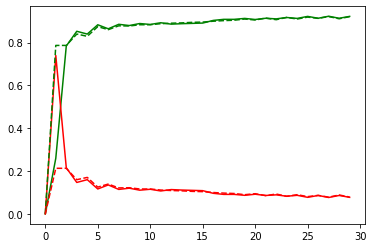

In [10]:
ra_Xtest = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_test_scaled,i)
  modelra=RatingModel(y_test, Pr_i)
  ra_Xtest[i,:]=modelra.accur_Error(y_test, Pr_i)
ra_Xtrain = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_train_scaled,i)
  modelra=RatingModel(y_train, Pr_i)
  ra_Xtrain[i,:]=modelra.accur_Error(y_train, Pr_i)
iter=range(model.T)
plt.plot(iter,ra_Xtest[:,0],'g-', label='Test accuracy')
plt.plot(iter,ra_Xtest[:,1],'r-', label='Test error')
plt.plot(iter,ra_Xtrain[:,0],'g--', label='Train accuracy')
plt.plot(iter,ra_Xtrain[:,1],'r--', label='Train error')


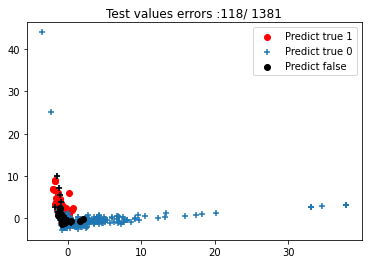

In [11]:
sumerror=0;
y_new=y_test
y_new[y_new==0]=-1
sumerror=np.size(y_new[Pr!=y_new])
gd1=datac[(Pr==1)]
gd0=datac[(Pr==-1)]
ge1=datac[(y_new!=Pr)&(Pr==1)]
ge0=datac[(y_new!=Pr)&(Pr==-1)]
plt.title('Test values errors :'+str(sumerror)+'/ '+str(X_test_scaled.shape[0]))
plt.scatter(gd1[:,0],gd1[:,1], marker='o',c="red")
plt.scatter(gd0[:,0],gd0[:,1], marker='+',)
plt.scatter(ge1[:,0],ge1[:,1], c="black", marker='o')
plt.scatter(ge0[:,0],ge0[:,1], c="black", marker='+',)
plt.legend(['Predict true 1', 'Predict true 0', 'Predict false'])
plt.savefig('lettersCG_XtextError.png')